# STA 141B Final Project, Magic the Gathering
## Deck Generator

In [17]:
import pandas as pd
from bs4 import BeautifulSoup
import json
import numpy as np
import requests
import re
import random
import palettable
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [2]:
whiteData = pd.read_csv("magicWhite.csv")
blueData = pd.read_csv("magicBlue.csv")
blackData = pd.read_csv("magicBlack.csv")
redData = pd.read_csv("magicRed.csv")
greenData = pd.read_csv("magicGreen.csv")

newWhite = pd.read_csv("onlyWhite.csv")
newBlue = pd.read_csv("onlyBlue.csv")
newBlack = pd.read_csv("onlyBlack.csv")
newRed = pd.read_csv("onlyRed.csv")
newGreen = pd.read_csv("onlyGreen.csv")

### Generator Function
For this generator, the randomized filters will be printed and then the images for the deck chosen will be displayed

{'First Filter': 'Organization', 'Second Filter': 'Unicolor', 'Third Filter': 'aggro', 'Fourth Filter': 'fair'}


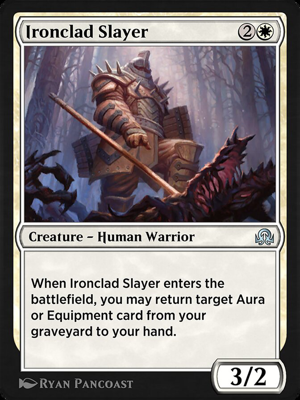

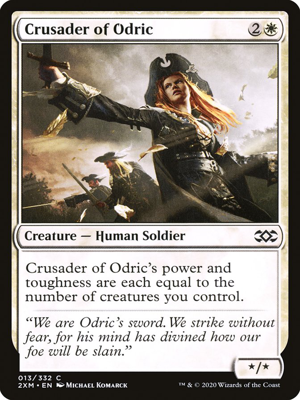

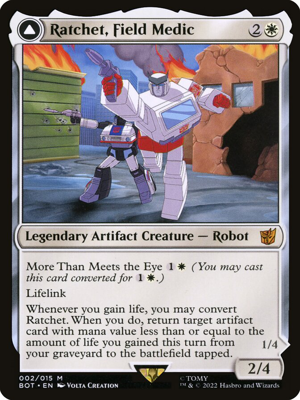

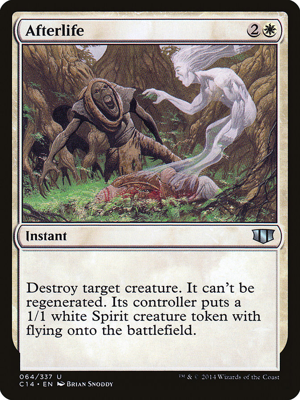

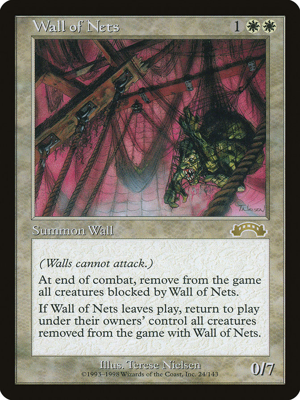

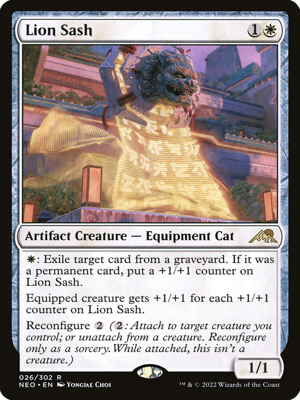

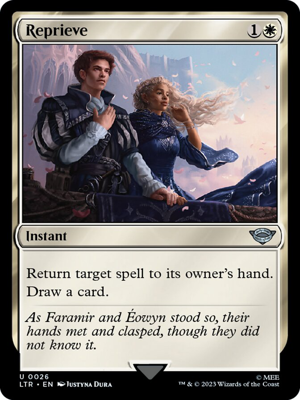

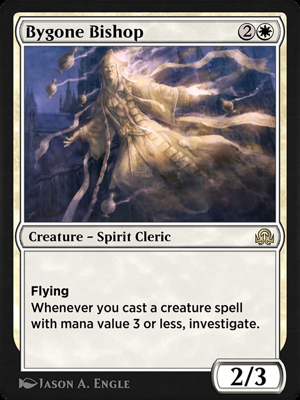

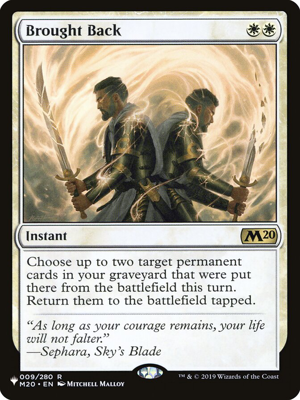

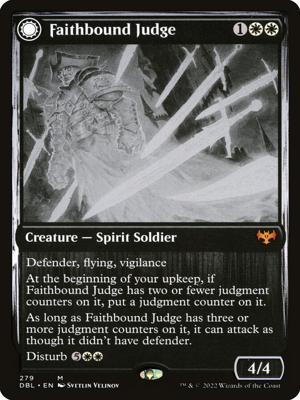

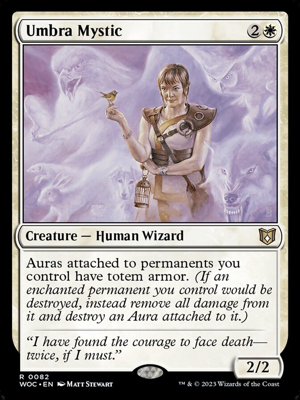

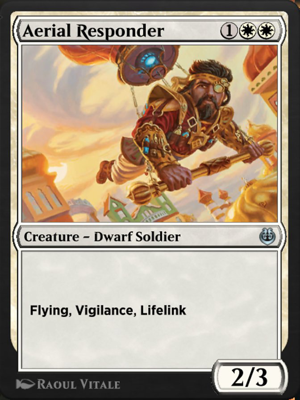

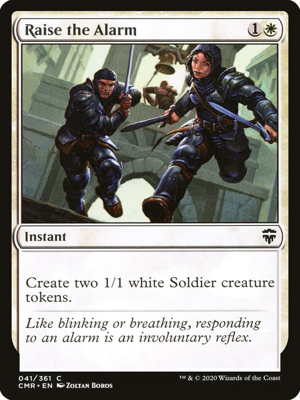

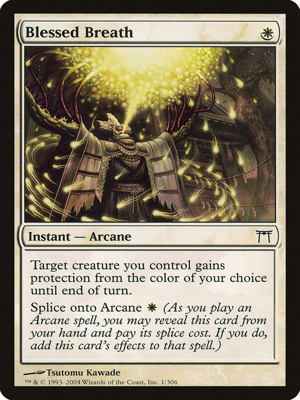

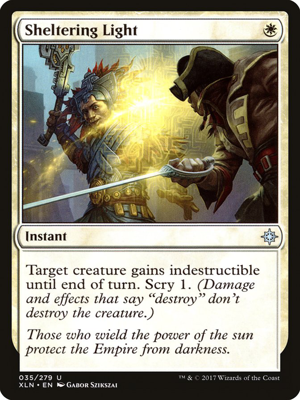

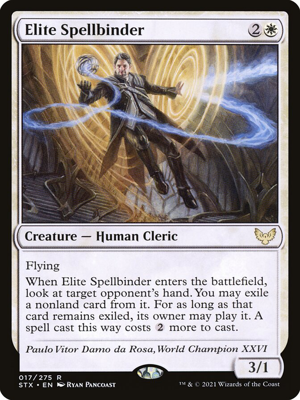

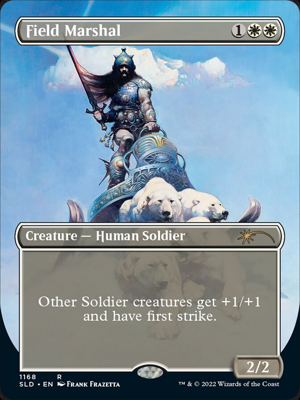

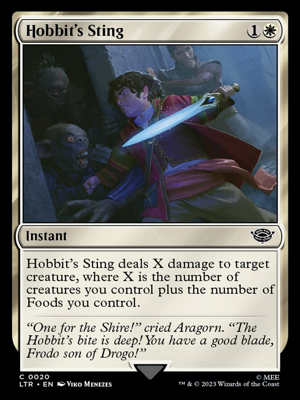

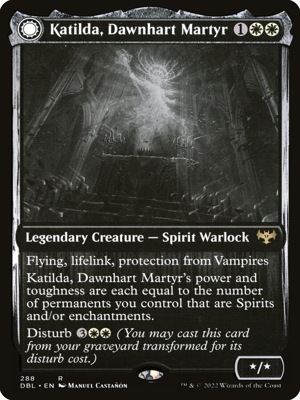

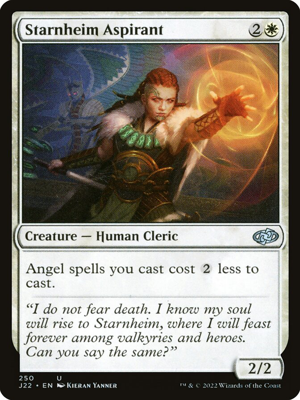

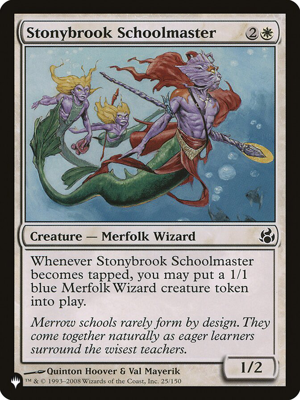

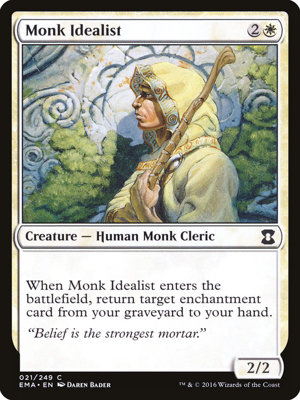

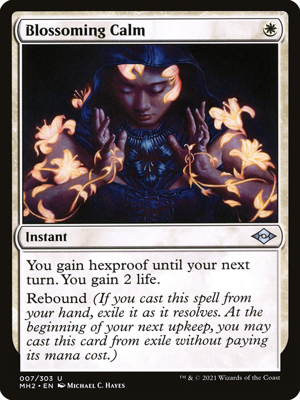

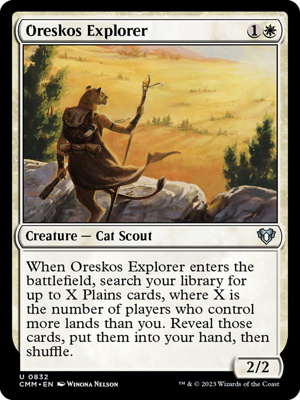

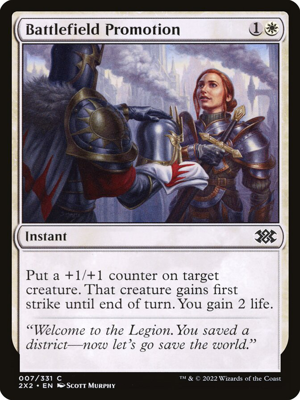

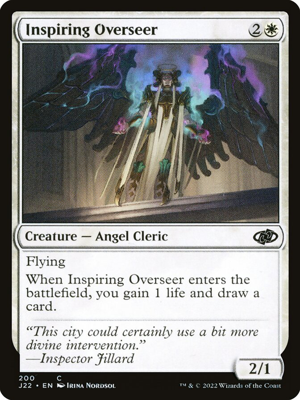

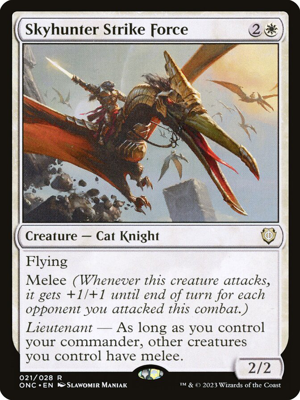

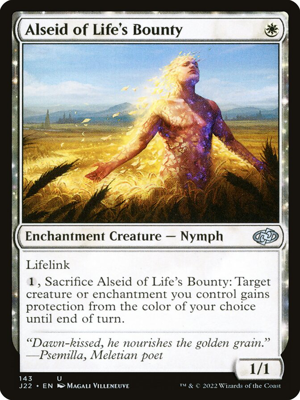

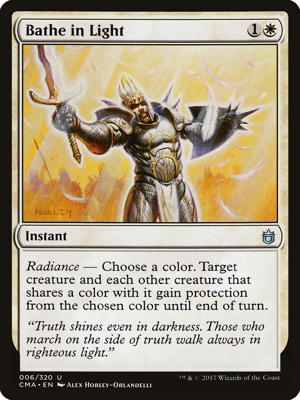

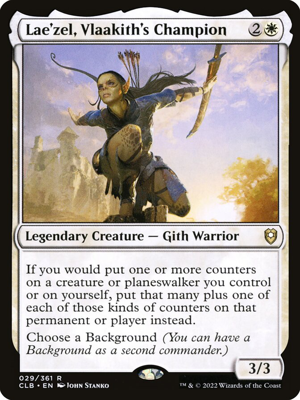

In [23]:
def deckGen():
    firstFilterList = ["Organization","Inginuity","Power","Emotion","Instinct"]
    secondFilterList = ["Unicolor","Multicolor"]
    thirdFilterList = ["aggro","control","midrange"]
    fourthFilterList = ["fair","fun"]
    filterDict = {"First Filter":" ","Second Filter":" ",
                  "Third Filter":" ","Fourth Filter":" "}
    color = None
    data = None
    CMCrange = None
    princeCard = None
    saltRange = None

    firstFilter = random.choice(firstFilterList)
    filterDict["First Filter"] = firstFilter
    if firstFilter == "Organization":
        color = [newWhite,whiteData]
    elif firstFilter == "Inginuity":
        color = [newBlue,blueData]
    elif firstFilter == "Power":
        color = [newBlack,blackData]
    elif firstFilter == "Emotion":
        color = [newRed,redData]
    else:
        color = [newGreen,greenData]

    secondFilter = random.choice(secondFilterList)
    filterDict["Second Filter"] = secondFilter
    if secondFilter == "Unicolor":
        data = color[0]
    else:
        data = color[1]

    thirdFilter = random.choice(thirdFilterList)
    filterDict["Third Filter"] = thirdFilter
    if thirdFilter == "aggro": #up to 36 Creature cards
        CMCrange = [0,4]
        princeCard = ["Creature","Instant","Plainswalker"] #30 or more of these
    elif thirdFilter == "midrange":
        CMCrange = [3,8]
        princeCard = ["Enchantment","Plainswalker","Battle"] #20 or more of these
    else: # up to 30 land
        CMCrange = [7,15]

    fourthFilter = random.choice(fourthFilterList)
    filterDict["Fourth Filter"] = fourthFilter
    if fourthFilter == "fair":
        saltRange = [0,1]
    else:
        saltRange = [1,2]

    data = data[(data["CMC"]>CMCrange[0])&(data["CMC"]<CMCrange[1])]
    data = data[(data["Salt"]>saltRange[0])&(data["Salt"]<saltRange[1])]
    newData = None
    if thirdFilter!="control":
        if thirdFilter=="aggro":
            data = data[data["Type_x"].isin(princeCard)]
            if data.shape[0]>=30:
                newData = data.sample(n=30)
            else:
                newData = data[data["Type_x"].isin(princeCard)]
        else:
            data = data[data["Type_x"].isin(princeCard)]
            if data.shape[0]>=30:
                newData = data.sample(n=20,replace=False)
                addData = data.sample(n=10)
                newData = pd.concat([newData,addData])
            else:
                newData = data[data["Type_x"].isin(princeCard)]
    else:
        if data.shape[0]>=30:
            newData = data.sample(n=30)
        else:
            newData = data
    print(filterDict)
    if newData.shape[0]<30:
        if secondFilter == "Unicolor":
            addData = color[0].sample(n=(30-newData.shape[0]),replace=False)
            newData = pd.concat([newData,addData])
        else:
            addData = color[1].sample(n=(30-newData.shape[0]),replace=False)
            newData = pd.concat([newData,addData])

    return newData.reset_index(drop=True)

newData = deckGen()

for i in range(newData.shape[0]):
        
    card_response = requests.get(newData["URL"][i])
    url = BeautifulSoup(card_response.text,"html.parser").find("meta",property="og:image")["content"]
    urllib.request.urlretrieve(url,"gfg.png") 
    img = Image.open("gfg.png").resize((300, 400)) 
    display(img)